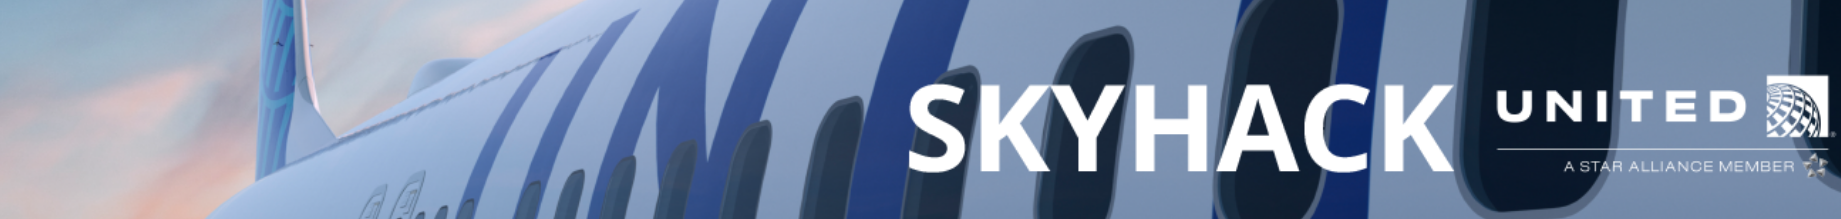

# Working with `comments` ___ 0003

-------------------------------------------------------------------------------------------

In [2]:
## importing libraries and packages

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


import nltk
from nltk.corpus import stopwords

In [3]:
## loading the data

summer_comments = pd.read_csv("Datasets/Summer_Comments.csv", encoding='cp1252')
summer_comments.head()

,flight_number,station_codes,origin_station_code,destination_station_code,arrival_delay_group,departure_delay_group,ques_verbatim_text,verbatim_text,satisfaction_type,loyalty_program_level,fleet_usage,response_group
0,5253,DEX-EGX,DEX,EGX,Early & Ontime,Delayed,Is there anything else you'd like to share abo...,N/a.,Satisfied,non-elite,Express,member
1,4717,DEX-HDX,HDX,DEX,Early & Ontime,Early & Ontime,Is there anything else you'd like to share abo...,Not really. The length of the flight is too sh...,Satisfied,non-elite,Express,member
2,3662,EWX-PVX,PVX,EWX,Delayed,Early & Ontime,Is there anything else you'd like to share abo...,Did not serve any.,Satisfied,NaN,Express,non-member
3,3481,INX-ORX,INX,ORX,Early & Ontime,Early & Ontime,Is there anything else you'd like to share abo...,Very short flight so no time for service.,Dissatisfied,non-elite,Express,member
4,3481,INX-ORX,INX,ORX,Early & Ontime,Early & Ontime,Is there anything else you'd like to share abo...,Very short flight so no time for service.,Dissatisfied,NaN,Express,non-member


In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

# Download the NLTK stopwords if you haven't already
nltk.download('stopwords')
nltk.download('punkt')

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Define a function to process sentences
def process_sentence(sentence):
    # Tokenize the sentence into words
    words = word_tokenize(sentence)

    # Define a list of English stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    punctuation = set(string.punctuation)

    # Remove stopwords and punctuation
    filtered_words = [stemmer.stem(word) for word in words if word.lower() not in stop_words and word not in punctuation]

    # Join the filtered words back into a sentence
    filtered_sentence = ' '.join(filtered_words)

    return filtered_sentence

# summer_comments['verbatim_filter_text'] = []
filtered_sentence = []

# Process each sentence
for sentence in summer_comments['verbatim_text']:
    filter_sentence = process_sentence(sentence)
#     summer_comments['verbatim_filter_text'].append(filtered_sentence)
    filtered_sentence.append(filter_sentence)
    


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saiba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saiba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
filtered_sentence

['n/a',
 'realli length flight short offer food beverag servic',
 'serv',
 'short flight time servic',
 'short flight time servic',
 'food beverag offer flight ...... plu much plane machin nois whole time',
 'bottl water necessari get addit beverag',
 'noth',
 'even though flight short wish would hand sort snack',
 'food box improv best',
 'food beverag 47 minut flight',
 'even though water offer durat flight make n/a',
 'higher qualiti wine would nice',
 'servic',
 'servic',
 'could gave us cuppa coffe tho short flight',
 'would nice drink servic short flight',
 'coffe unfortun avail due broken machin receiv water check sever time',
 'short flight expect anyth',
 'glad see could get bloodi mari mix board beverag choic',
 'snack bag great',
 'water soda',
 'offer short flight',
 'would nice afford snack along beverag like small bag peanut chip etc',
 'mayb chang nut chees cracker',
 'awar water avail flight',
 "expect anyth short fight 's",
 'offer one snack drink',
 'fine',
 '',
 '',


In [8]:
# adding the column to the result

summer_comments['verbatim_filter_text'] = filtered_sentence

In [9]:
summer_comments.head()

,flight_number,station_codes,origin_station_code,destination_station_code,arrival_delay_group,departure_delay_group,ques_verbatim_text,verbatim_text,satisfaction_type,loyalty_program_level,fleet_usage,response_group,verbatim_filter_text
0,5253,DEX-EGX,DEX,EGX,Early & Ontime,Delayed,Is there anything else you'd like to share abo...,N/a.,Satisfied,non-elite,Express,member,n/a
1,4717,DEX-HDX,HDX,DEX,Early & Ontime,Early & Ontime,Is there anything else you'd like to share abo...,Not really. The length of the flight is too sh...,Satisfied,non-elite,Express,member,realli length flight short offer food beverag ...
2,3662,EWX-PVX,PVX,EWX,Delayed,Early & Ontime,Is there anything else you'd like to share abo...,Did not serve any.,Satisfied,NaN,Express,non-member,serv
3,3481,INX-ORX,INX,ORX,Early & Ontime,Early & Ontime,Is there anything else you'd like to share abo...,Very short flight so no time for service.,Dissatisfied,non-elite,Express,member,short flight time servic
4,3481,INX-ORX,INX,ORX,Early & Ontime,Early & Ontime,Is there anything else you'd like to share abo...,Very short flight so no time for service.,Dissatisfied,NaN,Express,non-member,short flight time servic


In [10]:
summer_comments['verbatim_filter_text'][:4][3]

'short flight time servic'

## Extracting important `key-words` from the texts

In [11]:
## importing libraries
from rake_nltk import Rake


## initialize the dependencies
rake = Rake()

## applying the instance
print(summer_comments['verbatim_text'][500], summer_comments['satisfaction_type'][500])
rake.extract_keywords_from_text(summer_comments['verbatim_filter_text'][500])
print(rake.get_ranked_phrases_with_scores())
for rating, keywords in rake.get_ranked_phrases_with_scores():
    if rating > 5:
        print(rating, keywords)

When I was offered the chicken as an option the attendant did not say it was curry chicken. The meal was fine just not my favorite. Satisfied
[(100.0, 'offer chicken option attend say curri chicken meal fine favorit')]
100.0 offer chicken option attend say curri chicken meal fine favorit


In [90]:
from nltk.tokenize import word_tokenize

# comment = "This is a customer comment with some keywords."

token = []

for comment in summer_comments['verbatim_filter_text']:
#     print(comment)
    tokens = word_tokenize(comment)
    token.append(tokens)


In [94]:
len(token)

2308

In [95]:
from nltk.util import ngrams

n = 2  # For bi-grams, set n to 2; for n-grams, set n to the desired number

bi_gram = []


for tokens in token:
    bi_grams = list(ngrams(tokens, n))
    bi_gram.append(bi_grams)


In [97]:
# bi_gram

In [100]:
from collections import Counter

bi_gram_count = []

for bi_grams in bi_gram:
    bi_gram_counts = Counter(bi_grams)
    bi_gram_count.append(bi_gram_counts)

In [103]:
# bi_gram_count

In [120]:
min_keyword_frequency = 1  # Adjust as needed

bi_gram_keywords = [bi_gram for bi_gram, count in bi_gram_counts.items() if count >= min_keyword_frequency]

bi_gram_keyword = set()

for bi_gram_counts in bi_gram_count:
    for bi_grams, count in bi_gram_counts.items():
        if count >= min_keyword_frequency:
            bi_gram_keyword.add((bi_grams, count))
#             print(bi_grams)


In [121]:
# bi_gram_keywords, bi_gram_counts

In [123]:
print(bi_gram_keyword)

{(('option', 'might'), 1), (('coffe', 'great'), 1), (('good', 'would'), 1), (('like', 'glad'), 1), (('option', 'includ'), 1), (('lemony-sweety-crunchi', 'mix'), 1), (('point', 'go'), 1), (('prefer', 'fresh'), 1), (('lot', 'better'), 1), (('phoenix', 'fli'), 1), (('attend', 'need'), 1), (('wet', 'wipe'), 1), (('other', 'anoth'), 1), (('air', 'canada'), 1), (('eg', 'klm'), 1), (('cold', 'tasteless'), 1), (('want', 'buy'), 1), (('requir', 'payment'), 1), (('time', 'fl'), 1), (('product', 'cash'), 1), (('purchas', 'code'), 1), (('takeoff', 'packag'), 1), (('long', 'enough'), 1), (('made', 'flight'), 1), (('meal', 'part'), 1), (('comfort', 'plu'), 1), (('much', 'provid'), 1), (('choic', 'ethnic'), 1), (('passeng', 'airplan'), 1), (('like', 'scrambl'), 1), (('like', 'healthi'), 1), (('similar', 'option'), 1), (('half', 'coffe'), 1), (('meal', 'repetit'), 1), (('first', 'class'), 2), (('would', 'brought'), 1), (('horribl', 'stale'), 1), (('sandwich', 'option'), 1), (('sometim', 'complex'), 1)

## Plotting `Word-Cloud` 

----------------------------------------------------------------
**For Better Visualization**

In [126]:
from wordcloud import WordCloud

In [146]:
from nltk.tokenize import word_tokenize

# comment = "This is a customer comment with some keywords."

satisfied_token = []

## considering only satisfied comments
# satisfied_reviews = summer_comments[summer_comments['satisfaction_type'] == 'Satisfied']['verbatim_filter_text']
satisfied_reviews = summer_comments[summer_comments['satisfaction_type'] == 'Satisfied']['verbatim_text']


for comment in satisfied_reviews:
#     print(comment)
    tokens = word_tokenize(comment)
    satisfied_token.extend(tokens)
    
'''
use the extend method to add individual tokens to the satisfied_token list, 
and then we use join to concatenate all tokens into a single string, which is then used to generate the word cloud.'''


## Convert the list of tokens to a single string
satisfied_text = ' '.join(satisfied_token)

In [147]:
# token

In [148]:
## dissatisfied token creating

from nltk.tokenize import word_tokenize

dissatisfied_token = []

## cosnidering only dissatisfied comments
# dissatisfied_reviews = summer_comments[summer_comments['satisfaction_type'] == 'Dissatisfied']['verbatim_filter_text']
dissatisfied_reviews = summer_comments[summer_comments['satisfaction_type'] == 'Dissatisfied']['verbatim_text']

for comment in dissatisfied_reviews:
    tokens = word_tokenize(comment)
    dissatisfied_token.extend(tokens) 
    
    
'''
use the extend method to add individual tokens to the satisfied_token list, 
and then we use join to concatenate all tokens into a single string, which is then used to generate the word cloud.'''


## Convert the list of tokens to a single string
dissatisfied_text = ' '.join(dissatisfied_token)

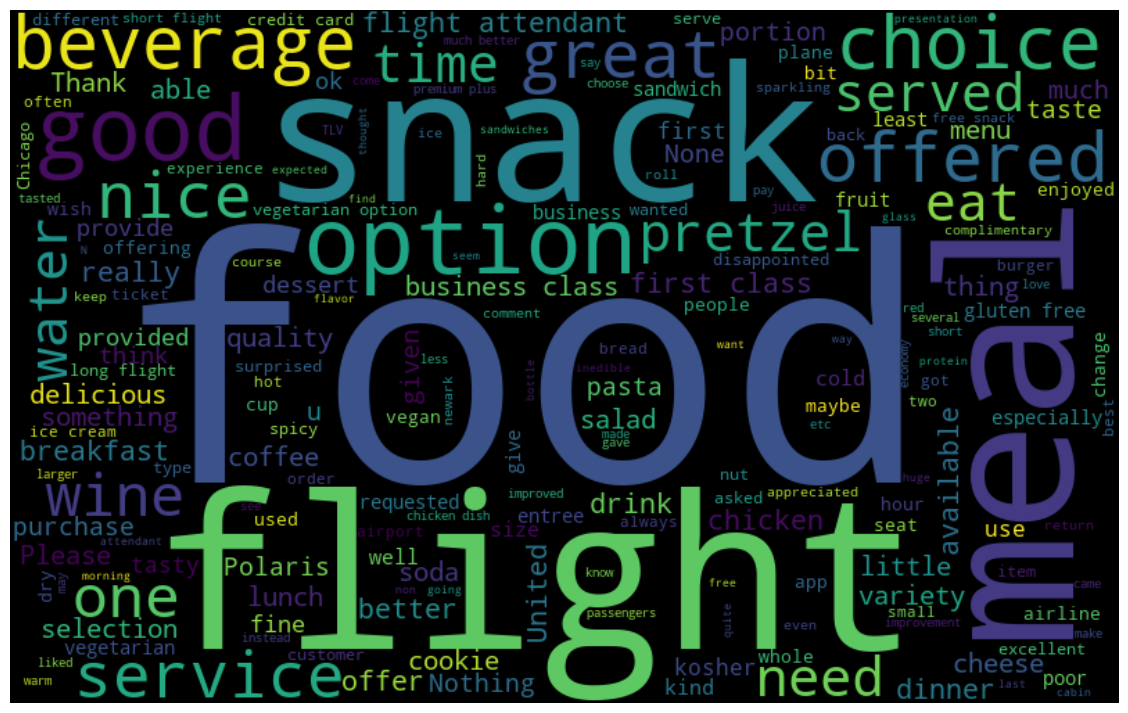

In [153]:
## plotting word cloud for satisfied tokens

wordcloud = WordCloud(width = 800, height= 500, 
                      background_color='black').generate(satisfied_text)

# Plot the word cloud
plt.figure(figsize=(16,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.show()

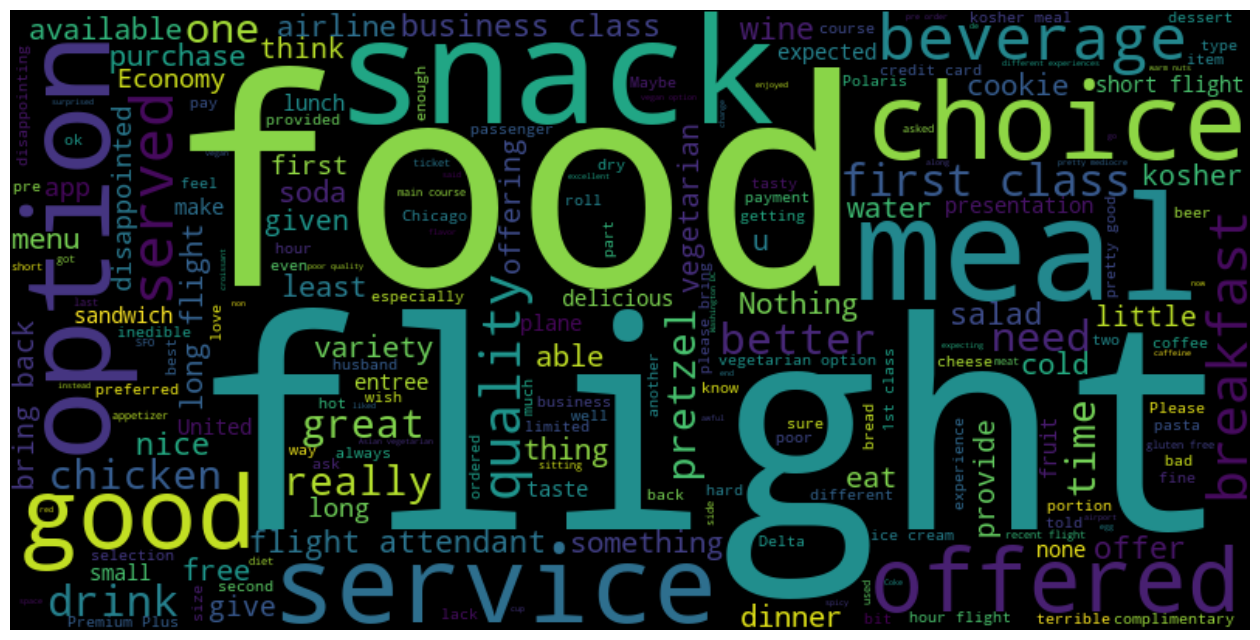

In [154]:
## plotting word cloud for dissatisfied tokens

wordcloud = WordCloud(width = 800, height= 400, 
                      background_color='black').generate(dissatisfied_text)

# Plot the word cloud
plt.figure(figsize=(16,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.show()